$$ 
\Large \underline{\textbf{Problema 8}}
$$

Evalúe, utilizando los métodos de Euler, de Heun y de Runge Kutta de cuarto orden, la ecuación diferencial

$$ \large
\frac{dy}{dx}=4e^{0.8x}-0.5y
$$

con la condición de contorno y(0) = 2, desde x = 0 hasta x = 4, con varios tamaños de paso. Compare la
exactitud de los diferentes métodos con el resultado exacto en x = 4. Grafique este error en función del esfuerzo
de cálculo realizado (cantidad de veces que tuvo que evaluar la función). Compare la soluciones numéricas
obtenidas, y(x), con la solución teórica

$$ \large
y(x)=\frac{4}{1.3}(e^{0.8x}-e^{-0.5x})+2e^{-0.5x}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$ \large \textbf
{Datos del problema 7}
$

$ \large \textbf{
Método de Euler}
$

In [2]:
def euler(p, x0=0, xf=4, y0=2):
    x = np.linspace(x0, xf, p)
    h = x[1]-x[0]
    yeuler = [y0]
    for i, xi in enumerate(x[:-1]):
        fi = 4*np.exp(0.8*xi)-0.5*yeuler[i]
        yeuler.append(yeuler[i]+fi*h)
    return yeuler

$ \large \textbf{
Método de Heun}
$

In [3]:
def heun(p, x0=0, xf=4, y0=2):
    yheun = [y0]
    x = np.linspace(x0, xf, p)
    h = x[1]-x[0]
    for i, xi in enumerate(x[:-1]):
        fi = 4*np.exp(0.8*xi)-0.5*yheun[i]  # f(ti,yi)
        fi1 = yheun[i] + fi*h  # f(ti+1,yi+1)
        yheun.append(yheun[i]+1/2*h*(fi+fi1))
    return yheun

$ \large \textbf{
Método de Runge-Kutta}
$

In [4]:
def rk4(p, x0=0, xf=4, y0=2):
    yrk = [y0]
    x = np.linspace(x0, xf, p)
    h = x[1]-x[0]
    for i, xi in enumerate(x[:-1]):
        k1 = 4*np.exp(0.8*xi)-0.5*yrk[i]
        x2 = xi + 1/2*h
        y2 = yrk[i] + 1/2*k1*h
        k2 = 4*np.exp(0.8*x2)-0.5*y2
        x3 = xi + 1/2*h
        y3 = yrk[i] + 1/2*k2*h
        k3 = 4*np.exp(0.8*x3)-0.5*y3
        x4 = xi + h
        y4 = yrk[i] + k3*h
        k4 = 4*np.exp(0.8*x4)-0.5*y4
        yrk.append(yrk[i]+1/6*(k1+2*k2+2*k3+k4)*h)
    return yrk

Text(0.5, 1.0, 'Comparación cada método')

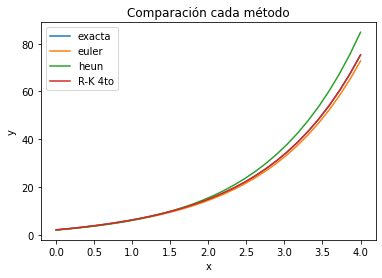

In [5]:
x = np.linspace(0, 4, 30)
y = []
for i, xi in enumerate(x):
    y.append(4/1.3*(np.exp(0.8*xi)-np.exp(-0.5*xi))+2*np.exp(-0.5*xi))
plt.plot(x, y, label='exacta')
plt.plot(x, euler(30), label='euler')
plt.plot(x, heun(30), label='heun')
plt.plot(x, rk4(30), label='R-K 4to')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación cada método')

In [29]:
vectorpasos = np.logspace(1, 3, 20).astype(int)

In [30]:
yeuler = [euler(p)[-1] for p in vectorpasos]
yheun = [heun(p)[-1] for p in vectorpasos]
yrk4 = [rk4(p)[-1] for p in vectorpasos]
ereuler = np.abs((yeuler-y[-1])/yeuler)
erheun = np.abs((yheun-y[-1])/yheun)
errk4 = np.abs((yrk4-y[-1])/yrk4)

Text(0.5, 1.0, 'Comparación cada método')

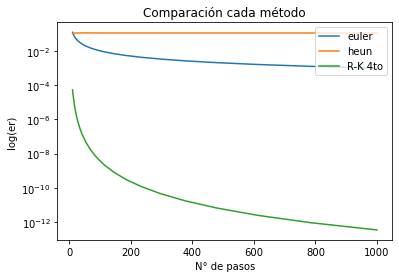

In [32]:
plt.semilogy(vectorpasos, ereuler, label='euler')
plt.semilogy(vectorpasos, erheun, label='heun')
plt.semilogy(vectorpasos, errk4, label='R-K 4to')
plt.legend(loc='upper right')
plt.xlabel('N° de pasos')
plt.ylabel('log(er)')
plt.title('Comparación cada método')